In [1]:
from skimage.feature import hog
import matplotlib.image as mpimg
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

`skimage.feature.hog(image, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(3, 3), block_norm='L1', visualise=False, 
                    transform_sqrt=False, feature_vector=True, normalise=None)`
                 
The number of `orientations` is specified as an integer, and represents the number of orientation bins that the gradient information will be split up into in the histogram. Typical values are between 6 and 12 bins.

The `pixels_per_cell parameter` specifies the cell size over which each gradient histogram is computed. This paramater is passed as a 2-tuple so you could have different cell sizes in x and y, but cells are commonly chosen to be square.

The `cells_per_block` parameter is also passed as a 2-tuple, and specifies the local area over which the histogram counts in a given cell will be normalized. Block normalization is not necessarily required, but generally leads to a more robust feature set.

In [2]:
img = mpimg.imread('bbox-example-image.jpg')

In [3]:
r = img[:,:,1]

In [4]:
small_r = cv2.resize(r, (64,64))

In [8]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orient, (pix_per_cell,pix_per_cell), (cell_per_block,cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:
        features = hog(img, orient, (pix_per_cell,pix_per_cell), (cell_per_block,cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features

In [6]:
features, hog_img = get_hog_features(small_r,9,8,2,vis=True)

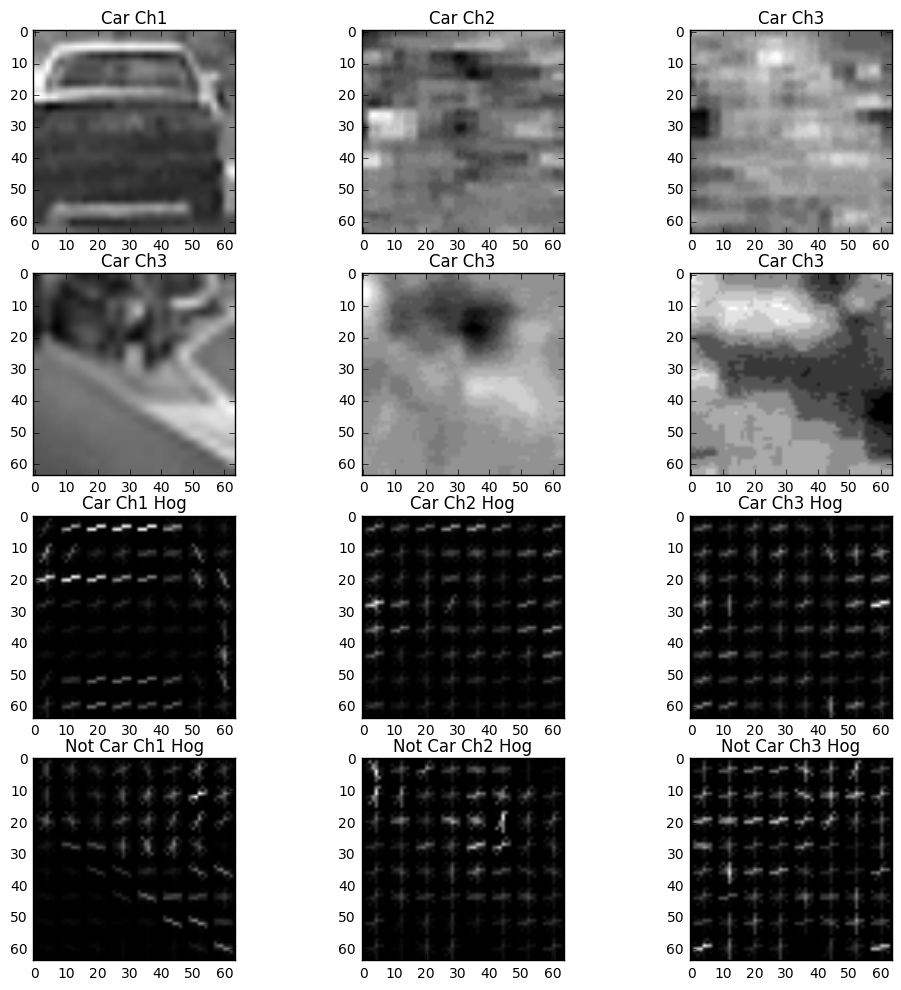

In [19]:
car = cv2.imread('/Users/jinjunjie/a_self_driving_car/Vehicle detection and tracking/images/vehicles/GTI_Far/image0934.png')
car = cv2.cvtColor(car, cv2.COLOR_BGR2YCrCb)
not_car = cv2.imread('/Users/jinjunjie/a_self_driving_car/Vehicle detection and tracking/images/non-vehicles/GTI/image4.png')
not_car = cv2.cvtColor(not_car, cv2.COLOR_BGR2YCrCb)

plt.figure(figsize=(12,12))
plt.subplot(431)
plt.imshow(car[:,:,0],cmap='gray')
plt.title('Car Ch1')
plt.subplot(432)
plt.imshow(car[:,:,1],cmap='gray')
plt.title('Car Ch2')
plt.subplot(433)
plt.imshow(car[:,:,2],cmap='gray')
plt.title('Car Ch3')
plt.subplot(434)
plt.imshow(not_car[:,:,0],cmap='gray')
plt.title('Car Ch3')
plt.subplot(435)
plt.imshow(not_car[:,:,1],cmap='gray')
plt.title('Car Ch3')
plt.subplot(436)
plt.imshow(not_car[:,:,2],cmap='gray')
plt.title('Car Ch3')

_,hog_image = get_hog_features(car[:,:,0],9,pix_per_cell=8,cell_per_block=2,vis=True)
plt.subplot(437)
plt.imshow(hog_image, cmap='gray')
plt.title('Car Ch1 Hog')
_,hog_image = get_hog_features(car[:,:,1],9,pix_per_cell=8,cell_per_block=2,vis=True)
plt.subplot(438)
plt.title('Car Ch2 Hog')
plt.imshow(hog_image, cmap='gray')
_,hog_image = get_hog_features(car[:,:,2],9,pix_per_cell=8,cell_per_block=2,vis=True)
plt.subplot(439)
plt.title('Car Ch3 Hog')
plt.imshow(hog_image,cmap='gray')

_,hog_image = get_hog_features(not_car[:,:,0],9,pix_per_cell=8,cell_per_block=2,vis=True)
plt.subplot(4,3,10)
plt.imshow(hog_image,cmap='gray')
plt.title('Not Car Ch1 Hog')
_,hog_image = get_hog_features(not_car[:,:,1],9,pix_per_cell=8,cell_per_block=2,vis=True)
plt.subplot(4,3,11)
plt.title('Not Car Ch2 Hog')
plt.imshow(hog_image,cmap='gray')
_,hog_image = get_hog_features(not_car[:,:,2],9,pix_per_cell=8,cell_per_block=2,vis=True)
plt.subplot(4,3,12)
plt.title('Not Car Ch3 Hog')
plt.imshow(hog_image,cmap='gray')

## Combine and normalize the features

In [8]:
def bin_spatial(img, color_space='RGB', size=(32,32)):
    """Takes an input an image, a color space and a new image size. 
     Return a feature vector"""
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)
    # Use cv2.resize().ravel() to creat the feature vector
    features = cv2.resize(feature_image, size).ravel()
    return features

In [9]:
def color_hist(image, nbins=32, bins_range=(0,256)):
    # Take histograms in R, G and B
    rhist = np.histogram(image[:,:,0], nbins, bins_range) # hist[0] -> counts in each bin
    ghist = np.histogram(image[:,:,1], nbins, bins_range) # hist[1] -> bin edges
    bhist = np.histogram(image[:,:,2], nbins, bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0],ghist[0],bhist[0]))
    return hist_features

In [10]:
def extract_features_color(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        else: feature_image = np.copy(image)      
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # Apply color_hist() also with a color space option now
        hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        # Append the new feature vector to the features list
        features.append(np.concatenate((spatial_features, hist_features)))
    # Return list of feature vectors
    return features

In [11]:
import glob
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import time

In [12]:
non_vehicles = glob.glob('./images/non-vehicles_smallset/notcars*/*.jpeg')
vehicles = glob.glob('./images/vehicles_smallset/cars*/*.jpeg')

In [13]:
not_car_features = extract_features_color(non_vehicles,cspace='RGB',spatial_size=(32, 32),hist_bins=32, hist_range=(0, 256))
car_features = extract_features_color(vehicles,cspace='RGB',spatial_size=(32, 32),hist_bins=32, hist_range=(0, 256))

In [14]:
# Define a label vector based on features lists
y = np.hstack((np.ones(len(car_features)),np.zeros(len(not_car_features))))

In [15]:
# Concatanate both car_features and not_car_features
X = np.vstack((car_features, not_car_features)).astype(np.float64)  
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=0)

In [17]:
svc = LinearSVC()
# Train the SVC
t=time.time()
svc.fit(X_train, y_train)
t2=time.time()
print(round(t2-t, 2), 'Seconds th train SCV...')

3.7 Seconds th train SCV...


In [18]:
# Check the accuracy of the classifier
n_predict = 10
t=time.time()
print('Test Accuracy of SVC:{:.3f}'.format(svc.score(X_test, y_test)))
print('My SVC predicts:', svc.predict(X_test[0:n_predict]))
print("For labels:", y_test[0:n_predict])
t2=time.time()
print(round(t2-t,5),'Seconds to predict',n_predict,'labels with SVC')

Test Accuracy of SVC:0.987
My SVC predicts: [ 1.  1.  1.  0.  1.  0.  1.  1.  0.  0.]
For labels: [ 0.  1.  1.  0.  1.  0.  1.  1.  0.  0.]
0.00724 Seconds to predict 10 labels with SVC


In [19]:
def extract_features_HOG(imgs, cspace='RGB', orient=9,
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        else: feature_image = np.copy(image)  
        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        features.append(hog_features)
    # Return list of feature vectors
    return features

In [20]:
colorspace = 'HSV' # Can be RGB, HSV*, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 2 # Can be 0, 1, 2, or "ALL"

t=time.time()
car_features = extract_features_HOG(vehicles, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_features_HOG(non_vehicles, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')

4.66 Seconds to extract HOG features...


In [21]:
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

In [22]:
print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 1764
0.34 Seconds to train SVC...
Test Accuracy of SVC =  0.9527
My SVC predicts:  [ 0.  1.  1.  0.  1.  1.  0.  1.  0.  1.]
For these 10 labels:  [ 1.  1.  1.  0.  1.  1.  0.  1.  0.  1.]
0.00117 Seconds to predict 10 labels with SVC


# Hog sub-sampling window search

In [83]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2HSV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [84]:
def bin_spatial(img, size=(32,32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    spatial_features = np.hstack((color1, color2, color3))
    return spatial_features

In [85]:
def color_hist(image, nbins=32, bins_range=(0,255)):
    # Compute the histogram of the color channels seperately
    channel1_hist = np.histogram(image[:,:,0], nbins, bins_range) # hist[0] -> counts in each bin
    channel2_hist = np.histogram(image[:,:,1], nbins, bins_range) # hist[1] -> bin edges
    channel3_hist = np.histogram(image[:,:,2], nbins, bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0],channel2_hist[0],channel3_hist[0]))
    return hist_features

In [86]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orient, (pix_per_cell,pix_per_cell), (cell_per_block,cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:
        features = hog(img, orient, (pix_per_cell,pix_per_cell), (cell_per_block,cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features

In [87]:
import matplotlib.pyplot as plt

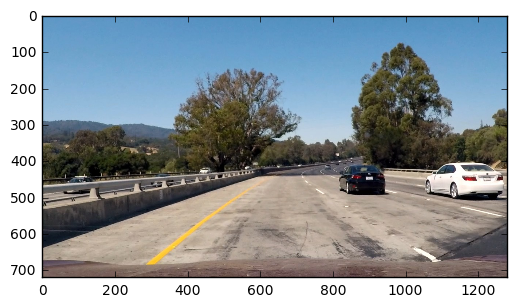

In [88]:
plt.imshow(img)

In [89]:
img = mpimg.imread('/Users/jinjunjie/a_self_driving_car/Vehicle detection and tracking/images/vehicles_smallset/cars1/1.jpeg')

In [193]:
def extract_features(imgs,orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    """Read the training images, extract features. Return concatenated features"""
    features = []
    for file in imgs:
#         # Read in each one by one
#         if '.png' in file:
#             image = mpimg.imread(file)*255
#         else:
#             image = mpimg.imread(file)
        image = mpimg.imread(file)
        image = convert_color(image, conv='RGB2YCrCb')
        
        ch1 = image[:,:,0]
        ch2 = image[:,:,1]
        ch3 = image[:,:,2]
        # Compute individual channel HOG features for the entire image
        hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=True)
        hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=True)
        hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=True)
        hog_features = np.hstack((hog1, hog2, hog3))
        # Get color features
        spatial_features = bin_spatial(image, size=spatial_size)
        hist_features = color_hist(image, nbins=hist_bins)
        # Concatanated all features
        all_features = np.hstack((spatial_features, hist_features, hog_features))
        features.append(all_features)
    return features

In [194]:
ystart = 400
ystop = 656
scale = 1.5
spatial_size = (32,32)
hist_bins = 32
orient = 9
pix_per_cell = 8
cell_per_block = 2

In [195]:
non_vehicles = glob.glob('/Users/jinjunjie/a_self_driving_car/Vehicle detection and tracking/images/non-vehicles/*/*.png')
vehicles = glob.glob('/Users/jinjunjie/a_self_driving_car/Vehicle detection and tracking/images/vehicles/*/*.png')
non_vehicles_features = extract_features(non_vehicles,orient=orient, pix_per_cell=pix_per_cell,
                                         cell_per_block=cell_per_block,spatial_size=spatial_size, hist_bins=hist_bins)
vehicles_features = extract_features(vehicles,orient=orient, pix_per_cell=pix_per_cell,
                                     cell_per_block=cell_per_block,spatial_size=spatial_size, hist_bins=hist_bins)

In [196]:
# Create an array stack of feature vectors
X = np.vstack((vehicles_features, non_vehicles_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(vehicles_features)), np.zeros(len(non_vehicles_features))))

# Split up data into randomized training and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=0)

In [197]:
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

46.91 Seconds to train SVC...
Test Accuracy of SVC =  0.9896


In [186]:
def find_cars(img, ystart, ystop, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, 
              cell_per_block, spatial_size, hist_bins):
    """A simple function that can extract features using hog sub-sampling and make prediction."""
    
    bboxes = []
    draw_img = np.copy(img)
    img = img.astype(np.float32) / 255 # why?
    
    img_tosearch = img[ystart:ystop,xstart:xstop]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2HSV')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale),np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]
    
    # Define blocks and steps
    nxblocks = (ch1.shape[1] // pix_per_cell) - 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - 1
    
    # original sampling rate: 64, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - 1
    cells_per_step = 2 # instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell
            
            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window],(64,64))
            
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)
            # Scale features and make predictions
            test_features = np.hstack((spatial_features, hist_features, hog_features)).reshape(1,-1)
            test_features = X_scaler.transform(test_features)
            test_prediction = svc.predict(test_features)
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img, (xbox_left+xstart,ytop_draw+ystart),(xbox_left+win_draw+xstart,ytop_draw+win_draw+ystart),(0,0,255),6)
                bboxes.append(((xbox_left,ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
    return draw_img, bboxes

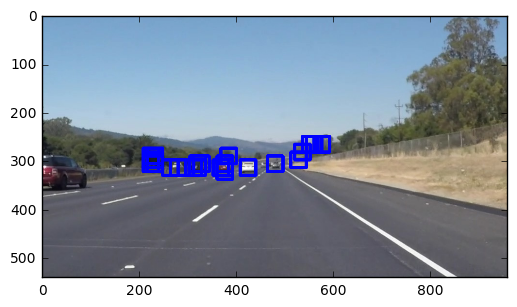

In [187]:
img = mpimg.imread('/Users/jinjunjie/a_self_driving_car/CarND-LaneLines-P1/data/test_images/solidWhiteRight.jpg')
out_img,bboxes = find_cars(img, 250, 700,200,600, 0.5, svc, X_scaler, orient, pix_per_cell, cell_per_block,
                    spatial_size, hist_bins)
plt.imshow(out_img)

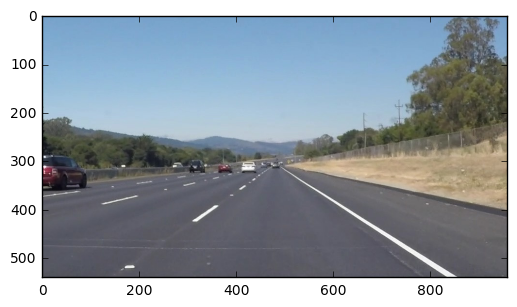

In [149]:
out_img,bboxes = find_cars(img, ystart, ystop, 2.5, svc, X_scaler, orient, pix_per_cell, cell_per_block,
                    spatial_size, hist_bins)
plt.imshow(out_img)

In [150]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bounding-boxes(bbox_list)
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each 'box' takes the form((x1,y1) , (x2,y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    return heatmap

In [151]:
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap < threshold] = 0
    return heatmap

In [157]:
heat = np.zeros_like(img[:,:,0]).astype(np.float)
heat = add_heat(heat, bboxes)

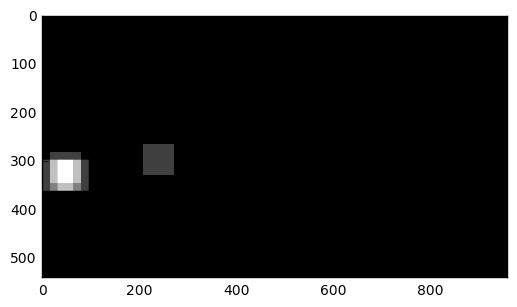

In [158]:
plt.imshow(heat, cmap='gray')

In [159]:
heatmap = apply_threshold(heat, 3)

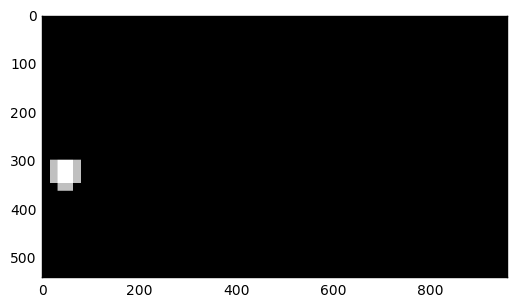

In [160]:
plt.imshow(heatmap, cmap='gray')

In [162]:
from scipy.ndimage.measurements import label
labels = label(heatmap) # labels[0] is an array the size of heatmap, labels[1] is the number of labels found

In [179]:
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)),((np.max(nonzerox)), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    return img

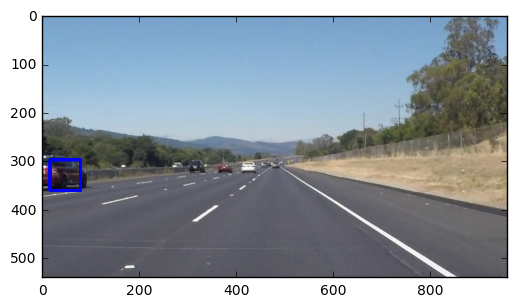

In [180]:
draw_img = draw_labeled_bboxes(np.copy(img), labels)
plt.imshow(draw_img)

# From the find_cars.txt

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from skimage.feature import hog
from sklearn.calibration import CalibratedClassifierCV

ystart = 400
ystop = 656
scale = 1.5
spatial_size = (32,32)
hist_bins = 32
orient = 9
pix_per_cell = 8
cell_per_block = 2

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2HSV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

def bin_spatial(img, size=(32,32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    spatial_features = np.hstack((color1, color2, color3))
    return spatial_features

def color_hist(image, nbins=32):
    # Compute the histogram of the color channels seperately
    channel1_hist = np.histogram(image[:,:,0],nbins,range=(0,179)) # hist[0] -> counts in each bin
    channel2_hist = np.histogram(image[:,:,1],nbins,range=(0,255)) # hist[1] -> bin edges
    channel3_hist = np.histogram(image[:,:,2],nbins,range=(0,255))
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0],channel2_hist[0],channel3_hist[0]))
    return hist_features

def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orient, (pix_per_cell,pix_per_cell), (cell_per_block,cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:
        features = hog(img, orient, (pix_per_cell,pix_per_cell), (cell_per_block,cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features

def extract_features(imgs,orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    """Read the training images, extract features. Return concatenated features"""
    features = []
    for file in imgs:
        # Read in each one by one
        # if '.png' in file:
        #     image = mpimg.imread(file) * 255
        # else:
        image = cv2.imread(file)
        image = convert_color(image, conv='RGB2HSV')

        ch1 = image[:,:,0]
        ch2 = image[:,:,1]
        ch3 = image[:,:,2]
        # Compute individual channel HOG features for the entire image
        hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=True)
        hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=True)
        hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=True)
        hog_features = np.hstack((hog1, hog2, hog3))
        # Get color features
        spatial_features = bin_spatial(image, size=spatial_size)
        hist_features = color_hist(image, nbins=hist_bins)

        # Concatanated all features
        all_features = np.hstack((spatial_features, hist_features, hog_features))
        features.append(all_features)
    return features

non_vehicles = glob.glob('/Users/jinjunjie/a_self_driving_car/Vehicle detection and tracking/images/non-vehicles/*/*.png')
vehicles = glob.glob('/Users/jinjunjie/a_self_driving_car/Vehicle detection and tracking/images/vehicles/*/*.png')

non_vehicles_features = extract_features(non_vehicles,orient=orient, pix_per_cell=pix_per_cell,
                                         cell_per_block=cell_per_block,spatial_size=spatial_size, hist_bins=hist_bins)
vehicles_features = extract_features(vehicles,orient=orient, pix_per_cell=pix_per_cell,
                                     cell_per_block=cell_per_block,spatial_size=spatial_size, hist_bins=hist_bins)

# Create an array stack of feature vectors
X = np.vstack((vehicles_features, non_vehicles_features)).astype(np.float64)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(vehicles_features)), np.zeros(len(non_vehicles_features))))

# Split up data into randomized training and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=0)

# Use a linear SVC
svc = CalibratedClassifierCV(LinearSVC())

svc.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
            cv=3, method='sigmoid')

In [2]:
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

Test Accuracy of SVC =  0.9921


In [12]:
num = 5
print('Prob:',svc.predict_proba(X_test[num].reshape(1,-1)))
print(y_test[num])

Prob: [[  9.99810860e-01   1.89139889e-04]]
0.0


In [64]:
image = mpimg.imread(vehicles[100])
hsv_image = convert_color(image, conv='RGB2HSV')
hsv_image[:,:,1].max()

0.38461509

In [84]:
image = cv2.imread(vehicles[100])
hsv_image = convert_color(image, conv='RGB2HSV')
hsv_image[:,:,2].max()

255

In [70]:
image = mpimg.imread('/Users/jinjunjie/a_self_driving_car/Vehicle detection and tracking/images/non-vehicles_smallset/notcars1/extra41.jpeg')

In [72]:
image.max()

208